In [21]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.manifold import TSNE
import seaborn as sns

In [22]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
#Primero se cargan las caraterísticas normalizadas por z-score y min-max de forma.
# Cargar las características normalizadas por Z-score
df_shape_z = pd.read_csv(os.path.join(folder_path, "features_shape_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_shape_mm = pd.read_csv(os.path.join(folder_path, "features_shape_minmax.csv"))

#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_z_cl= df_shape_z.drop(columns=['filename', 'label'])
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_mm_cl= df_shape_mm.drop(columns=['filename', 'label'])


#Primero se cargan las caraterísticas normalizadas por z-score y min-max de forma.
# Cargar las características normalizadas por Z-score
df_textura_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_textura_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))

#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_z_cl= df_textura_z.drop(columns=['filename', 'label'])
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_mm_cl= df_textura_mm.drop(columns=['filename', 'label'])

#Primero se cargan las caraterísticas normalizadas por z-score y min-max de forma.
# Cargar las características normalizadas por Z-score
df_fourier_z = pd.read_csv(os.path.join(folder_path, "features_fourier_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_fourier_mm = pd.read_csv(os.path.join(folder_path, "features_fourier_all_minmax.csv"))

#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_z_cl= df_fourier_z.drop(columns=['filename', 'label'])
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_mm_cl= df_fourier_mm.drop(columns=['filename', 'label'])

#Selección de columnas de shape
#Seleccionadas (z-score)
selected_shape_z = ['eccentricity', 'extent', 'solidity']
df_shape_z_selected = df_shape_z[selected_shape_z]

#Seleccionadas (min-max)
selected_shape_mm = ['eccentricity', 'extent', 'solidity']
df_shape_mm_selected = df_shape_mm[selected_shape_mm]


#Selección de columnas de textura 
#Seleccionadas (z-score)
selected_textura_z = ['contrast', 'homogeneity', 'energy' ]
df_textura_z_selected = df_textura_z[selected_textura_z]

#Seleccionadas (min-max)
selected_textura_mm = ['contrast', 'homogeneity', 'energy' ]
df_textura_mm_selected = df_textura_mm[selected_textura_mm]


#Selección de columnas de fourier
#Seleccionadas (z-score)
selected_fourier_z = ['mean_magnitude', 'std_magnitude', 'label', 'filename']
df_fourier_z_selected = df_fourier_z[selected_fourier_z]

#Seleccionadas (min-max)
selected_fourier_mm = ['mean_magnitude', 'std_magnitude', 'label', 'filename']
df_fourier_mm_selected = df_fourier_mm[selected_fourier_mm]



#combinación z-score
df_combined_allnc_z = pd.concat([df_shape_z_selected, df_textura_z_selected, df_fourier_z_selected], axis=1)

#combinación minmax
df_combined_allnc_mm = pd.concat([df_shape_mm_selected, df_textura_mm_selected, df_fourier_mm_selected ], axis=1)

# Guardar en archivos CSV
df_combined_allnc_z.to_csv(os.path.join(folder_path, "features_combined_all_nocolor_zscore.csv"), index=False)
df_combined_allnc_mm.to_csv(os.path.join(folder_path, "features_combined_all_nocolor_minmax.csv"), index=False)

In [23]:
df_combined_allnc_z

,eccentricity,extent,solidity,contrast,homogeneity,energy,mean_magnitude,std_magnitude,label,filename
0,1.258475,-0.843346,0.135962,-0.117970,0.573895,1.615441,-0.675069,-0.789859,smaller,callo_1.png
1,1.265948,-1.740919,-1.705151,-0.689035,1.111661,1.826963,-0.332674,0.421457,smaller,callo_10.png
2,0.280864,1.120647,1.269197,0.723027,-0.528180,-0.424014,-0.726203,-1.157138,smaller,callo_100.png
3,0.602786,1.184475,0.913221,0.125226,-0.517080,-0.809188,-0.624806,-0.816866,smaller,callo_101.png
4,-0.817832,1.002834,1.210664,1.304987,-1.718236,-0.716244,-1.317448,-1.644363,smaller,callo_102.png
...,...,...,...,...,...,...,...,...,...,...
532,-0.758095,-0.543333,-0.607485,-0.277401,0.875899,0.606081,0.749086,0.945783,higher,callo_95.png
533,-1.279988,0.358045,0.055104,0.083434,1.088512,-0.232107,0.989613,0.780056,higher,callo_96.png
534,0.155389,-0.292736,-0.289068,-0.097836,0.451454,-0.024781,0.873905,0.820400,higher,callo_97.png
535,-0.407132,-1.763399,-1.467330,-0.449770,1.655792,2.974858,0.896289,1.520130,higher,callo_98.png


In [24]:
#se quitan las columnas 'filename' y 'label'
df_combined_allnc_mm_cl= df_combined_allnc_mm.drop(columns=['label', 'filename'])
df_combined_allnc_z_cl= df_combined_allnc_z.drop(columns=['label', 'filename'])


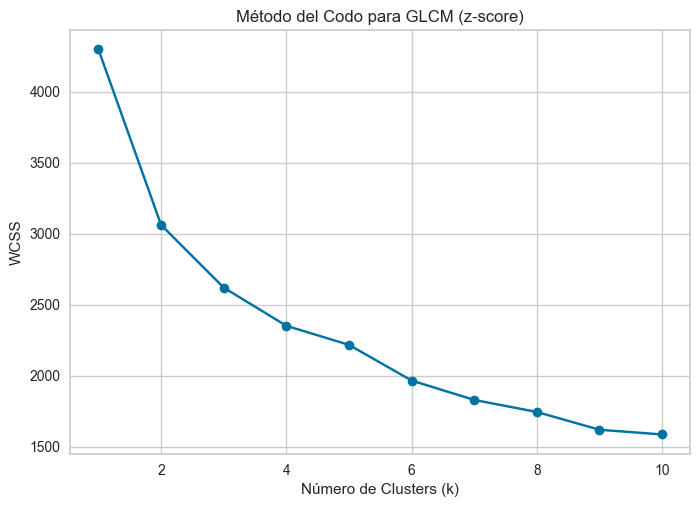

In [25]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_combined_allnc_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

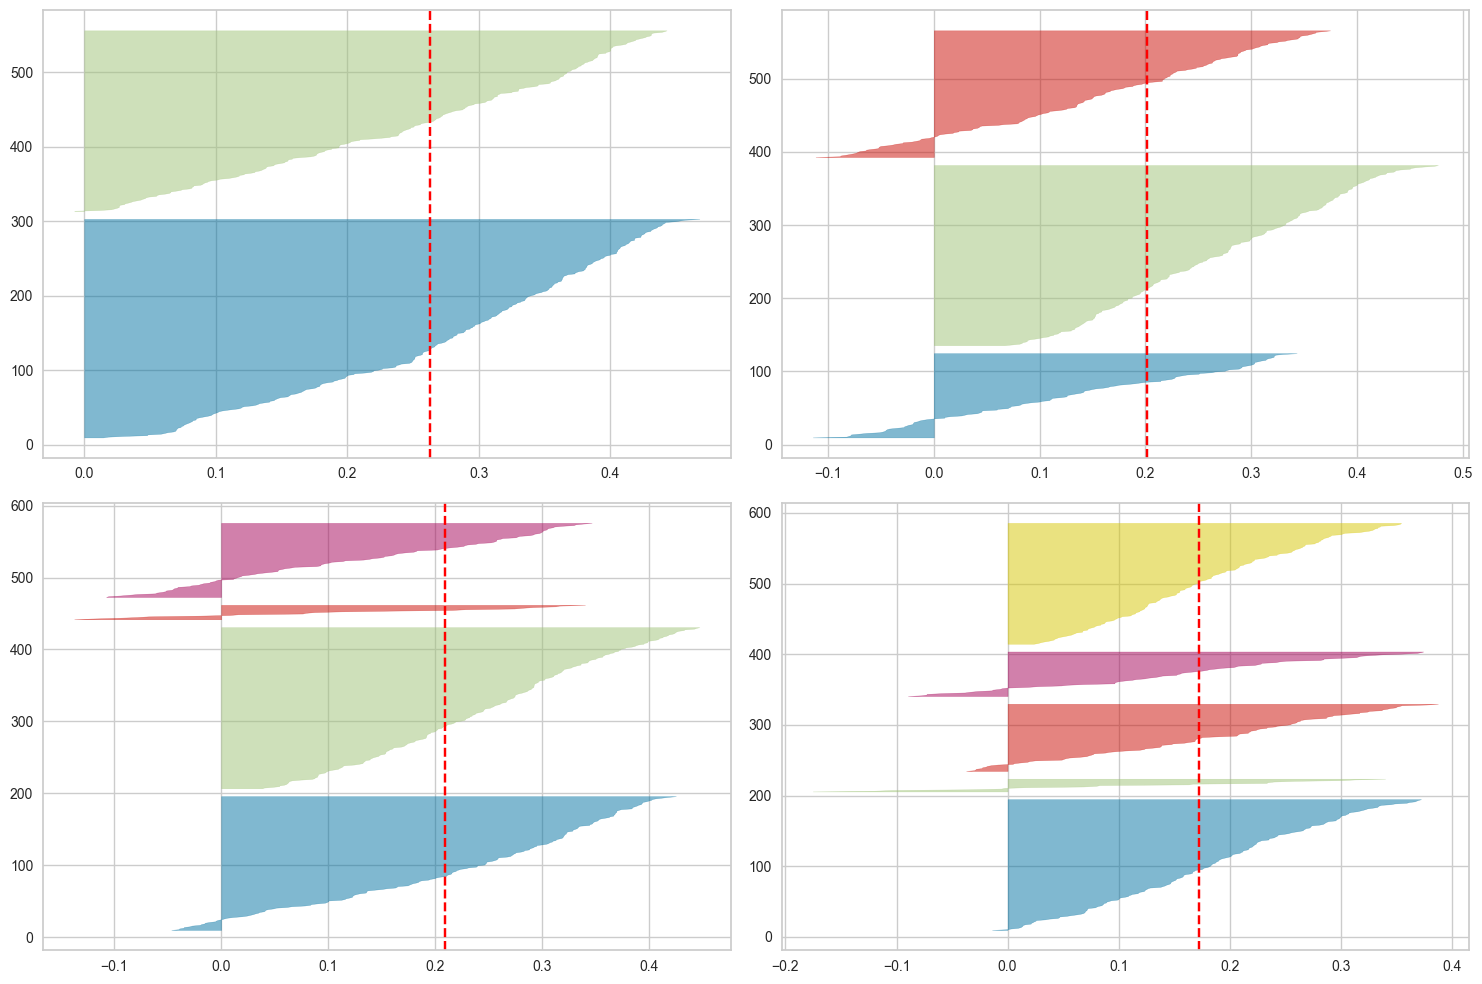

In [26]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_combined_allnc_z_cl)  

plt.tight_layout()
plt.show()

In [41]:
#Modelo k-means
cluster_allnc_z= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_allnc_z.fit(df_combined_allnc_z_cl)   

#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_combined_allnc_z['Cluster'] = cluster_allnc_z.labels_
pd.crosstab(df_combined_allnc_z['Cluster'], df_combined_allnc_z['label'])

label,higher,smaller
Cluster,,
0,233,61
1,35,208


In [ ]:
# Guardar resultados en DataFrame
df_resultado_z_umap = pd.DataFrame({
    'filename': df_combined_allnc_z['filename'],
    'label': df_combined_allnc_z['label'],
    'cluster': df_combined_allnc_z['Cluster']
})

# Guardar en archivo CSV 
#df_resultado_z_umap.to_csv(os.path.join(folder_path, 'resultado_kmeans_allnc_z.csv'), index=False)
df_resultado_z_umap

,filename,label,cluster
0,callo_1.png,smaller,0
1,callo_10.png,smaller,0
2,callo_100.png,smaller,1
3,callo_101.png,smaller,1
4,callo_102.png,smaller,1
...,...,...,...
532,callo_95.png,higher,0
533,callo_96.png,higher,0
534,callo_97.png,higher,0
535,callo_98.png,higher,0


In [29]:
silhouette_avg_allnc_z = silhouette_score(df_combined_allnc_z_cl, cluster_allnc_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_allnc_z}')

Índice de silueta promedio: 0.26279508576592525


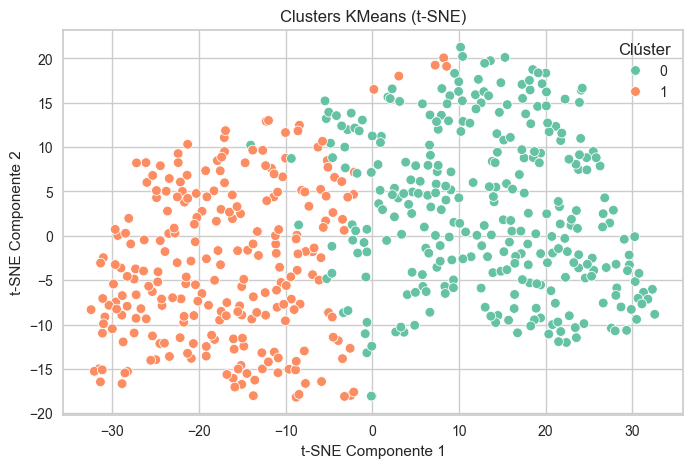

In [30]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_allnc_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_combined_allnc_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


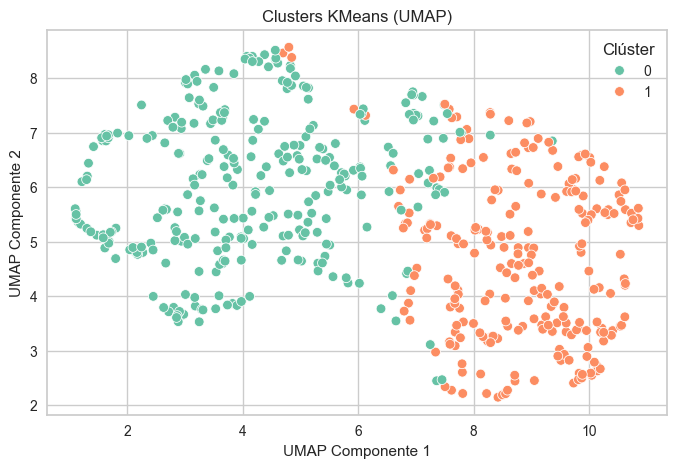

In [31]:
umap_model = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_combined_allnc_z_cl)

# Visualización correcta con UMAP
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_allnc_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

minmax

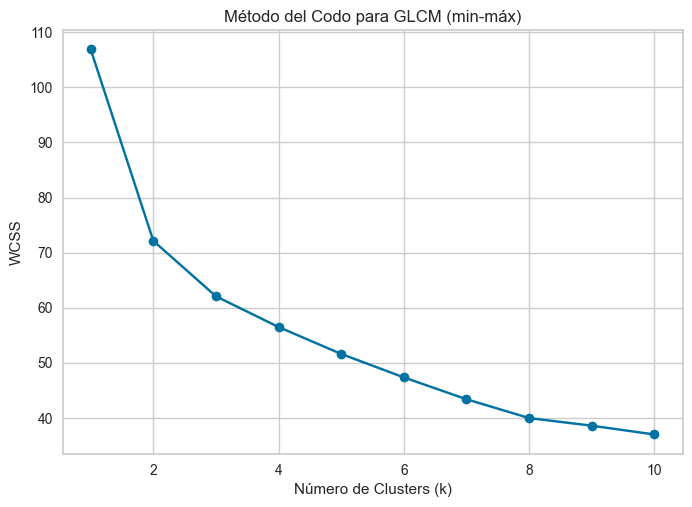

In [32]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_combined_allnc_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-máx)')
plt.grid(True)
plt.show()

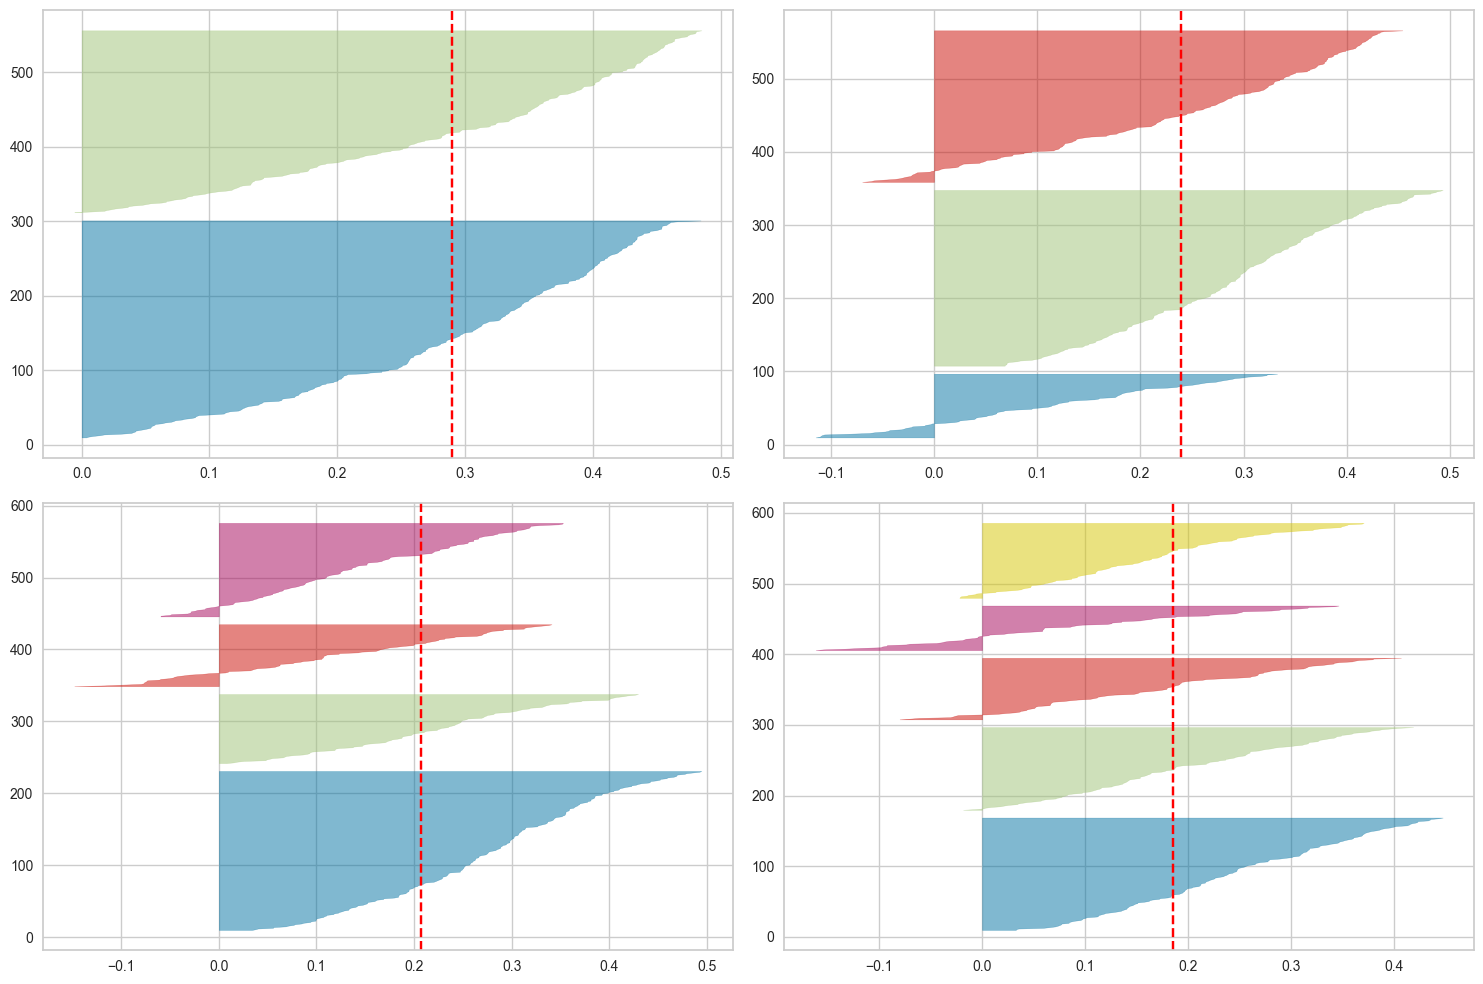

In [33]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_combined_allnc_mm_cl)  

plt.tight_layout()
plt.show()

In [42]:
#Modelo k-means
cluster_allnc_mm= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_allnc_mm.fit(df_combined_allnc_mm_cl)   

KMeans(n_clusters=3, random_state=42)

In [43]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_combined_allnc_mm['Cluster'] = cluster_allnc_mm.labels_
pd.crosstab(df_combined_allnc_mm['Cluster'], df_combined_allnc_mm['label'])

label,higher,smaller
Cluster,,
0,48,40
1,206,35
2,14,194


In [ ]:
# Guardar resultados en DataFrame
df_resultado_mm_umap = pd.DataFrame({
    'filename': df_combined_allnc_mm['filename'],
    'label': df_combined_allnc_mm['label'],
    'cluster': df_combined_allnc_mm['Cluster']
})

# Guardar en archivo CSV 
#df_resultado_z_umap.to_csv(os.path.join(folder_path, 'resultado_kmeans_allnc_mm.csv'), index=False)
df_resultado_mm_umap

,filename,label,cluster
0,callo_1.png,smaller,1
1,callo_10.png,smaller,0
2,callo_100.png,smaller,1
3,callo_101.png,smaller,1
4,callo_102.png,smaller,1
...,...,...,...
532,callo_95.png,higher,0
533,callo_96.png,higher,0
534,callo_97.png,higher,0
535,callo_98.png,higher,0


In [37]:
silhouette_avg_all_mm = silhouette_score(df_combined_allnc_mm_cl, cluster_allnc_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_all_mm}')

Índice de silueta promedio: 0.289802561226845


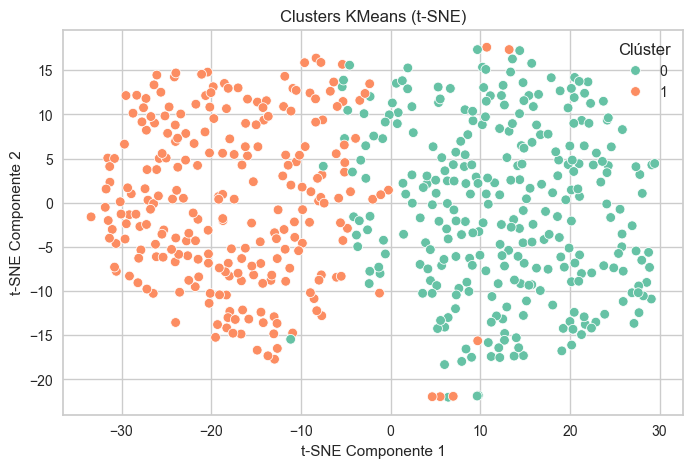

In [38]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_allnc_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_combined_allnc_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


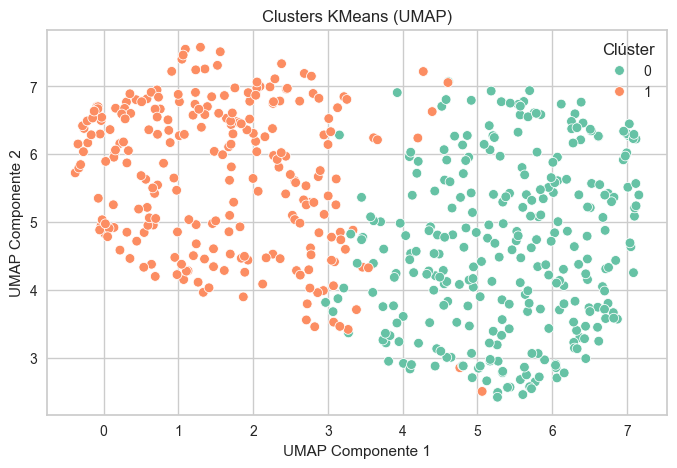

In [39]:
umap_model = umap.UMAP(n_neighbors=37,n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_combined_allnc_mm_cl)

# Visualización 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_allnc_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

Sin tener en cuenta el color:
Z-score sin reducción de la dimensionalidad: 
-2 clusteres:El 86.94% de las imágenes etiquetadas como higher están en el cluster 0, y 77.32% de las smaller en el cluster 1.
-3 clusteres: En el cluster 1 se encuentra el 69.77% de las imágenes higher y en el cluster 2 el 63.94%. En el cluster 0 hay una mezcla de ambos (79 y 37, predominando higher)

Min-max sin reduccion de la dimensuonalidad:
-2 clusteres: El 86.19% de higher en el cluster 0 y el  77.69% de las imágenes smaller están en el cluster 1.
-3 clusters: 76.86% de imágenes higher en el cluster 1, el 72.11% de las imágenes smaller en el cluster2. El cluster 0 está formado por 48 imágenes higher y 40 smaller.

Teniendo en cuenta características de color:
Z-score (sin reducir la dimensionalidad con umap):
-Se pueden obtener tres clusteres: En el cluster 1 se encontrarán el 76.49% de las imágenes etiquetadas como higher. En el cluster 2 estará el 68.02% de las imágenes etiquetadas como smaller. El cluster 0 está formado tanto por imágenes smaller como higher de forma más o mensoo equilibrada aunque hay 10 imágenes higher más.
-Con dos clusteres: En el cluster 1 hay una mezcla de imágenes higher y smaller (aunque más smaller) 134 higher y 213 smaller. En el cluster 0 hay 134 imágenes higher y 56 smaller.
Por tanto las imágenes higher están repartidas en ambos clusteres, aunque con presencia más notoria en el cluster 0 ya que solo hay 56 smaller. 

Minmax (sin reducir la dimensionalidad con umap):
-3 clusteres: en el cluster 1 se encuentra el 75.37% de las imágenes higher, y en el cluster 2 el 69.88% de las imágenes smaller. En el cluster 0 hay una mezcla más o menos equilibrada de higher y smaller.
-2 clusteres: En el cluster 0 está el 58.58% de las imágenes higher y el resto (111 imágenes) en el cluster 1. En el lcuster 1 hay 207 imágenes smaller (76.95%)
Por tanto con dos clusteres pasa commo con zscore más o menos cada mitad de las imágenes están en un cluster. 


Z score y Min max con reducción de dimensionalidad:pasa algo parecido en ambas y es que con tres clusteres, las imágenes higher ocupan 2 de ellos más o menos de forma equilibrada. En el cluster restante hay más cocnentración de puntos que representan a las imágenes smaller. Con dos clusteres: En uno hay más higher y en otro más smaller.


Por tanto parece que teniendo en cuenta el color si se hace tres clusteres hay una división de higher, si no se tiene en cuenta no.